In [325]:
#Import Libraries

#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore,normaltest

#Preprocess
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

#TrainTestSplit
from sklearn.model_selection import train_test_split,cross_val_score

#Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor

#Optimize
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#Joblib
import joblib

%matplotlib inline

In [282]:
#Import File
dfb=pd.read_csv('baseball.csv')

In [283]:
#Check head of file
dfb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [284]:
#Check info of columns
dfb.info()
#There are no null values and all the columns are int/float (continous)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [285]:
#Check stats of data
dfb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [286]:
#Since there are no null values check correlation of data
dfb.corr().loc['W'].drop('W').sort_values(ascending=False)
#We can see that there is much correlation of W with SV,ER,RA,ERA

SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

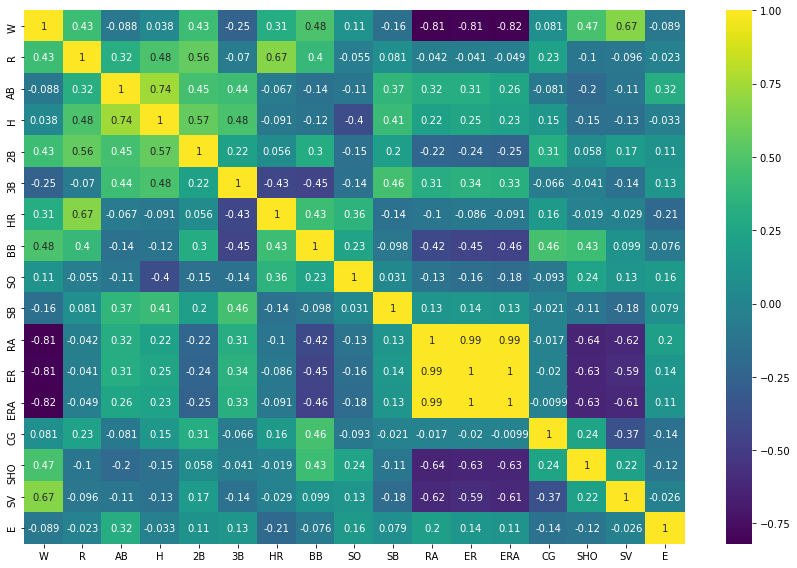

In [287]:
#Lets check it with Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfb.corr(),cmap='viridis',annot=True)
plt.tight_layout()
plt.show()
#We can see that ER-ERA are highly correlated

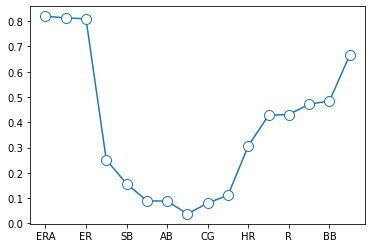

In [288]:
#plot highly correlated values with w
abs(dfb.corr().loc['W'].drop('W').sort_values()).plot(marker='o',markerfacecolor='white',markersize=10)
plt.show()

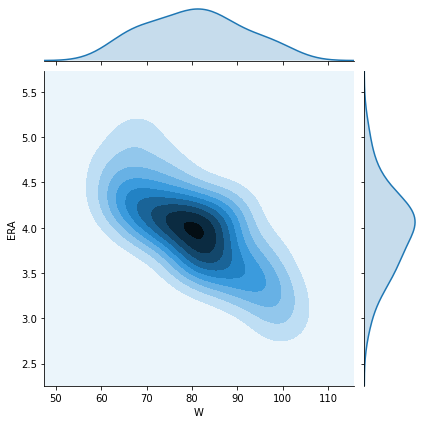

In [311]:
#There is linear relation between W and ERA column
sns.jointplot(x='W',y='ERA',data=dfb,kind='kde')
plt.show()

In [289]:
dfb.shape

(30, 17)

In [290]:
#Remove outliers
zs=zscore(dfb)
dfb=dfb[(zs<3).all(axis=1)]

In [291]:
dfb.shape

(29, 17)

In [292]:
#Check skewness
abs(dfb.skew())>0.55
#Data is skewed

W      False
R      False
AB     False
H       True
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG      True
SHO    False
SV      True
E       True
dtype: bool

In [293]:
#Use log1p to correct skewed data
for cols in dfb.columns:
    if abs(dfb.loc[:,cols].skew())>0.55:
        dfb.loc[:,cols]=np.log1p(dfb.loc[:,cols])

In [294]:
#Check skewness
abs(dfb.skew())>0.55
#Data is still skewed so we will use powertransformer

W      False
R      False
AB     False
H       True
2B     False
3B     False
HR     False
BB     False
SO     False
SB     False
RA     False
ER     False
ERA    False
CG     False
SHO    False
SV     False
E       True
dtype: bool

In [295]:
pt=PowerTransformer()

In [296]:
#Use Powertransformer (yeojohnson method) to correct skewed data
for cols in dfb.columns:
    if abs(dfb.loc[:,cols].skew())>0.55:
        dfb.loc[:,cols]=pt.fit_transform(dfb.loc[:,cols].values.reshape(-1,1))

In [297]:
k,p=normaltest(dfb)
print(k.mean())
print(p.mean())
#As the p value is greater than 0.05 we can conclude that the data is not normalized
#therefore we will use MinMaxscaler

1.2693024394406538
0.5895805082378739


In [298]:
#Scale data
sc=MinMaxScaler()
dfb_features=dfb.drop('W',axis=1)
dfb_target=dfb.loc[:,'W']
dfb_features=sc.fit_transform(dfb_features)
#We have scale only features as we would always like to normalize multi-dimensional data 
#and target would always be 1 dimensional

In [299]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(dfb_features, dfb_target, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [300]:
#Call the function
model_select(LinearRegression)

Max score is 0.7845463190918573 with random state 59


In [313]:
#Call the function
model_select(ElasticNet)

Max score is 0.4065805232748808 with random state 46


In [314]:
#Call the function
model_select(Ridge)

Max score is 0.8241188250212563 with random state 59


In [315]:
#Call the function
model_select(Lasso)

Max score is 0.6399010892719161 with random state 54


In [324]:
#Call the function
model_select(KNeighborsRegressor)

Max score is 0.7860308791093373 with random state 102


In [301]:
#Use the above randome state to get best result
X_train, X_test, y_train, y_test = train_test_split(dfb_features, dfb_target, test_size=0.33, random_state=59)

In [316]:
#Initiate an instance of the model
model=Ridge()

In [326]:
paramgrid={'alpha':[1.0,5.0,10.0,20.0,50.0,80.0,100.0]}
gscv=GridSearchCV(Ridge(),param_grid=paramgrid)
gscv.fit(X_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1.0, 5.0, 10.0, 20.0, 50.0, 80.0, 100.0]})

In [327]:
gscv.best_params_

{'alpha': 1.0}

In [328]:
#Fit the model
model.fit(X_train,y_train)

Ridge()

In [329]:
#Predict the values
predict=model.predict(X_test)

In [348]:
#Fetch scores using metrics
mae=mean_absolute_error(y_test,predict)
mse=mean_squared_error(y_test,predict)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,predict)
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('r2score is {}'.format(r2score))
#Here we can directly relate the Mean Absolute error values with the mean of W while analyzing the stats
#with describe()
#Mean of W is 80.96 while Mean Absolute error is 3.86 / If the difference is very high then it means that the
#model has performed well

MAE is 3.57151976777005
MSE is 18.40596496152552
RMSE is 4.290217355976911
r2score is 0.8241188250212563


In [331]:
#Create a dataframe of predicted and True values
predict_df=pd.DataFrame(predict,columns=['Predicted Values'])
predict_df=pd.concat([predict_df,y_test.reset_index()['W']],axis=1)

In [332]:
#Change columns of the dataframe
predict_df.columns=['Predicted Values','True Values']

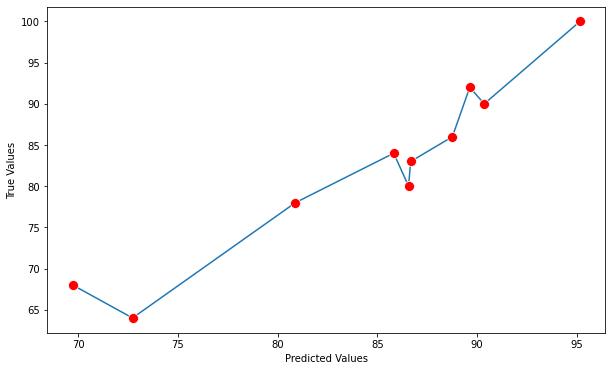

In [344]:
#Plot a graph showing how close are predicted and True Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.lineplot(x='Predicted Values',y='True Values',data=predict_df,ax=ax,marker='o',markerfacecolor='red',markersize=10)
#sns.lineplot(x='True Values',y=predict_df.index,data=predict_df,ax=ax,label='True Values')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values')
plt.show()
#This is how we would like to see our graph (Linear)

In [345]:
joblib.dump(model,'baseball_Ridge.obj')

['baseball_Ridge.obj']